<a href="https://colab.research.google.com/github/galihwangiputri/rock_paper_scissors_CNN/blob/main/rock_paper_scissors_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SUBMISSION** </br>
Galih Wangi Putri </br>
galihwangiputri@gmail.com

# Rock Paper Scissor CNN

### Import Library 

In [ ]:
import tensorflow as tf
import zipfile

### Prepare Dataset

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rock_paper_scissor.zip

--2020-11-05 20:12:10--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rock_paper_scissor.zip’

/tmp/rock_paper_sci 100%[===================>] 307.92M  11.3MB/s    in 33s     

2020-11-05 20:12:44 (9.29 MB/s) - ‘/tmp/rock_paper_scissor.zip’ saved [322873683/322873683]



In [ ]:
# Unzip file
zip_file = '/tmp/rock_paper_scissor.zip'
zip_ref = zipfile.ZipFile(zip_file, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [ ]:
# Split dataset (train and validation)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range=0.2,
    horizontal_flip=0.2,
    zoom_range=0.2,
    rotation_range=90,
    fill_mode='nearest',
    validation_split=0.4)

train_datagen = image_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    shuffle=True,
    class_mode='categorical',
    subset='training')

validation_datagen = image_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    shuffle=True,
    class_mode='categorical',
    subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


### Convolution Neural Network

In [ ]:
# build cnn model
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
            tf.keras.layers.MaxPool2D(2,2),
            tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
            tf.keras.layers.MaxPool2D(2,2),    
            tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
            tf.keras.layers.MaxPool2D(2,2),
            tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
            tf.keras.layers.MaxPool2D(2,2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(3, activation='softmax') # activation for categorical prob
])

# compile model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

# train model
history = model.fit(
    train_datagen, 
    epochs=20,
    validation_data = validation_datagen,
    validation_steps = 25,
    verbose=1
)

Epoch 1/20
42/42 [==============================] - 75s 2s/step - loss: 1.1133 - accuracy: 0.3554 - val_loss: 1.1024 - val_accuracy: 0.3450
Epoch 2/20
42/42 [==============================] - 74s 2s/step - loss: 0.9308 - accuracy: 0.5647 - val_loss: 1.2375 - val_accuracy: 0.4212
Epoch 3/20
42/42 [==============================] - 75s 2s/step - loss: 0.6763 - accuracy: 0.7154 - val_loss: 0.4836 - val_accuracy: 0.8200
Epoch 4/20
42/42 [==============================] - 80s 2s/step - loss: 0.4635 - accuracy: 0.8181 - val_loss: 0.4279 - val_accuracy: 0.8512
Epoch 5/20
42/42 [==============================] - 75s 2s/step - loss: 0.4133 - accuracy: 0.8356 - val_loss: 0.3792 - val_accuracy: 0.8587
Epoch 6/20
42/42 [==============================] - 75s 2s/step - loss: 0.3386 - accuracy: 0.8623 - val_loss: 0.3543 - val_accuracy: 0.8712
Epoch 7/20
42/42 [==============================] - 75s 2s/step - loss: 0.3260 - accuracy: 0.8798 - val_loss: 0.2406 - val_accuracy: 0.9175
Epoch 8/20
42/42 [==

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

Saving photo_2020-11-02 11.30.22.jpeg to photo_2020-11-02 11.30.22 (1).jpeg
paper


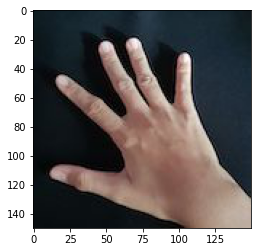

In [ ]:
# predict
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn 
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  # # check class order
  # print(validation_datagen.class_indices)

  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissor')
  else:
    print('Tidak terdeteksi')

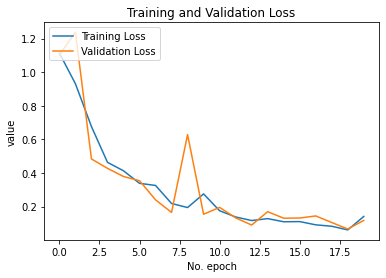

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

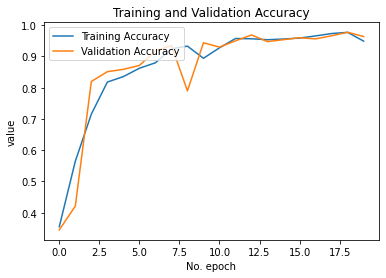

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
import numpy as np

def getLabel(dict):
    list(dict.keys())

validation_label = getLabel(validation_datagen.class_indices)

model.evaluate(validation_datagen, validation_label, verbose=1)

28/28 [==============================] - 15s 532ms/step - loss: 0.1473 - accuracy: 0.9451


[0.14730370044708252, 0.9450801014900208]